# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.1.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
#raise NotImplementedError("Build your model based on an architecture of your choice "
#                          "A sample model summary is shown below")

# load pre-trained model; the defult input size is 224 x 224.  
vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=(224, 224, 3)) 
vgg16.trainable = False
conv_1 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='conv_1')
conv_2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='conv_2')
flatten_1 = tf.keras.layers.Flatten(name='flatten_1')
dropout_1 = tf.keras.layers.Dropout(0.25, name='dropout_1')
dense_feature = tf.keras.layers.Dense(256, activation='relu',name='dense_feature')
dropout_2 = tf.keras.layers.Dropout(0.25, name='dropout_2')
dense_output = tf.keras.layers.Dense(1, name = 'dense_output',activation='sigmoid')
    
model = tf.keras.Sequential([vgg16,conv_1, conv_2,
                             flatten_1,dropout_1,dense_feature,dropout_2,dense_output])
model.build(input_shape=(None, 224, 224, 3))
model.summary()
        

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv_1 (Conv2D)              (None, 7, 7, 256)         1179904   
_________________________________________________________________
conv_2 (Conv2D)              (None, 7, 7, 256)         590080    
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               3211520   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

#### [5 points] Train Model

In [5]:
# change the learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=10000,
    decay_rate=0.9)

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                loss='binary_crossentropy',
                metrics=['accuracy'])

#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

#raise NotImplementedError("Use the model.fit function to train your network")
history = model.fit_generator(generator=train_batches,epochs=NUM_EPOCHS, validation_data=valid_batches,
                   steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID)

11
3
Instructions for updating:
Please use Model.fit, which supports generators.


C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 2 steps
Epoch 1/40


C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 12s 1s/step - loss: 1.8732 - accuracy: 0.5532 - val_loss: 0.8089 - val_accuracy: 0.5500
Epoch 2/40
10/10 [==============================] - 11s 1s/step - loss: 0.8010 - accuracy: 0.5106 - val_loss: 0.6705 - val_accuracy: 0.4500
Epoch 3/40
10/10 [==============================] - 11s 1s/step - loss: 0.6483 - accuracy: 0.6064 - val_loss: 0.4541 - val_accuracy: 1.0000
Epoch 4/40
10/10 [==============================] - 12s 1s/step - loss: 0.6466 - accuracy: 0.6064 - val_loss: 0.6672 - val_accuracy: 0.4500
Epoch 5/40
10/10 [==============================] - 12s 1s/step - loss: 0.6258 - accuracy: 0.6702 - val_loss: 0.3704 - val_accuracy: 0.8500
Epoch 6/40
10/10 [==============================] - 12s 1s/step - loss: 0.3701 - accuracy: 0.8800 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 7/40
10/10 [==============================] - 12s 1s/step - loss: 0.5526 - accuracy: 0.8404 - val_loss: 0.3116 - val_accuracy: 0.7500
Epoch 8/40
10/10 [=============

#### [5 points] Plot Accuracy and Loss During Training

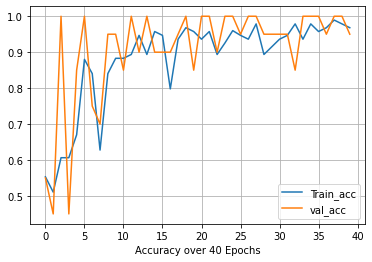

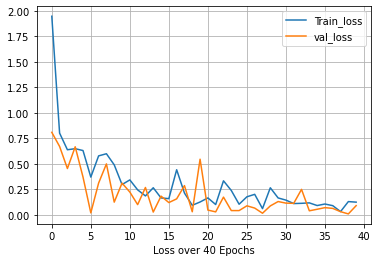

In [6]:
import matplotlib.pyplot as plt

#raise NotImplementedError("Plot the accuracy and the loss during training")
plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.xlabel('Accuracy over 40 Epochs')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Loss over 40 Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Plot Test Results

Found 18 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
18/18 [==============================] - 2s 104ms/step
covid\nejmoa2001191_f3-PA.jpeg


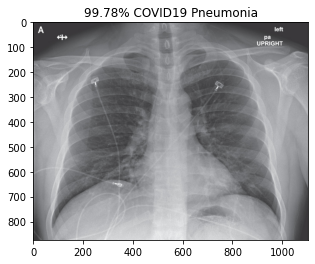

covid\nejmoa2001191_f4.jpeg


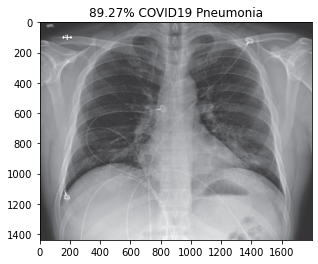

covid\nejmoa2001191_f5-PA.jpeg


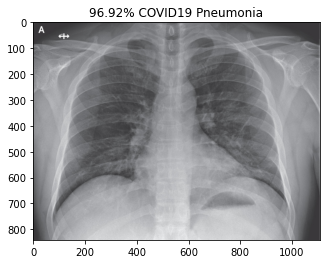

covid\radiol.2020200490.fig3.jpeg


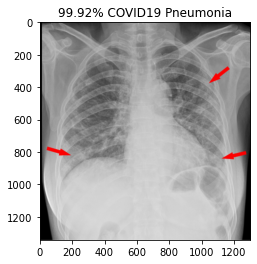

covid\ryct.2020200028.fig1a.jpeg


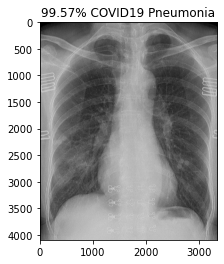

covid\ryct.2020200034.fig2.jpeg


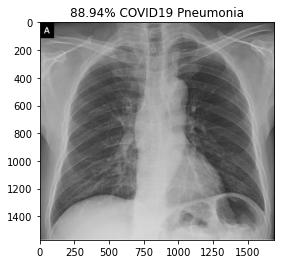

covid\ryct.2020200034.fig5-day0.jpeg


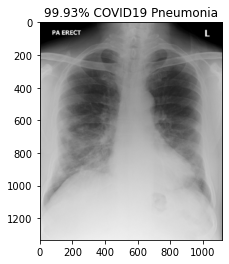

covid\ryct.2020200034.fig5-day4.jpeg


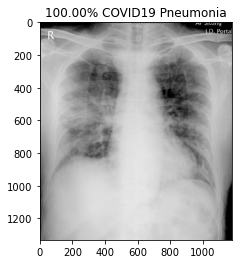

covid\ryct.2020200034.fig5-day7.jpeg


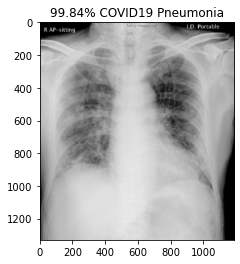

normal\NORMAL2-IM-1385-0001.jpeg


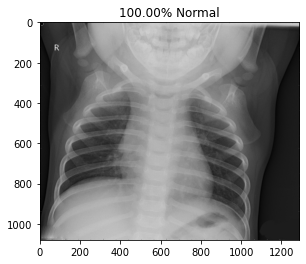

normal\NORMAL2-IM-1396-0001.jpeg


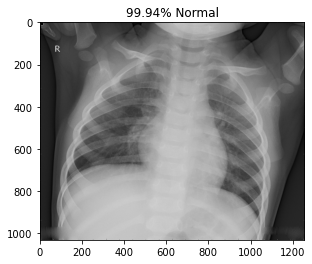

normal\NORMAL2-IM-1400-0001.jpeg


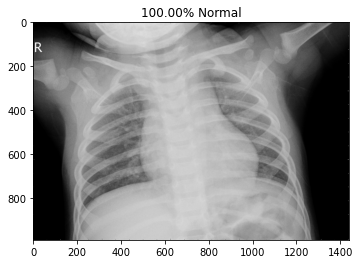

normal\NORMAL2-IM-1401-0001.jpeg


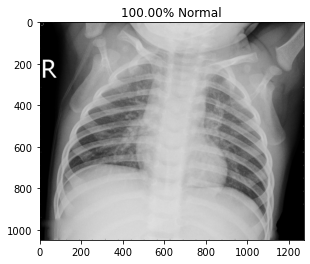

normal\NORMAL2-IM-1406-0001.jpeg


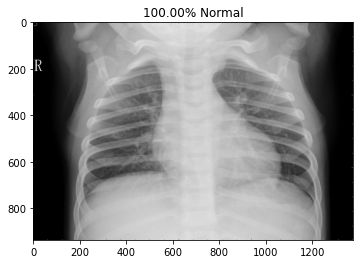

normal\NORMAL2-IM-1412-0001.jpeg


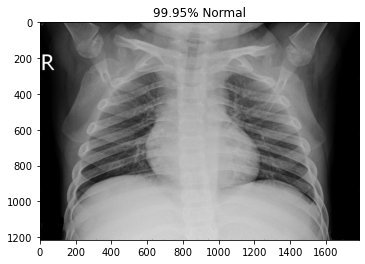

normal\NORMAL2-IM-1419-0001.jpeg


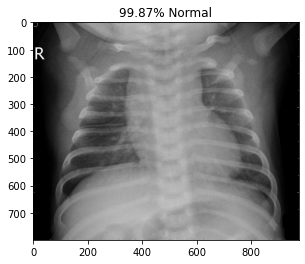

normal\NORMAL2-IM-1422-0001.jpeg


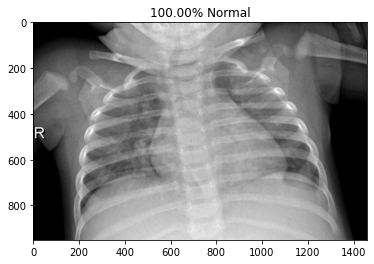

normal\NORMAL2-IM-1423-0001.jpeg


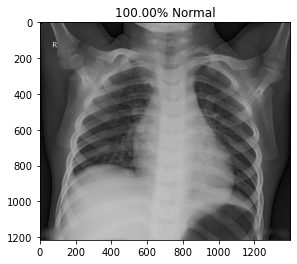

In [7]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
#print(pred)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

In [8]:
print(eval_generator.labels)
print(model.layers)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[<tensorflow.python.keras.engine.training.Model object at 0x00000199F62F87B8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000199F62F82B0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000199F51265F8>, <tensorflow.python.keras.layers.core.Flatten object at 0x00000199F630E940>, <tensorflow.python.keras.layers.core.Dropout object at 0x00000199F630EA58>, <tensorflow.python.keras.layers.core.Dense object at 0x00000199F630EB38>, <tensorflow.python.keras.layers.core.Dropout object at 0x00000199F630EBA8>, <tensorflow.python.keras.layers.core.Dense object at 0x00000199F630ED68>]


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

In [9]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('dense_feature').output)
#print(intermediate_layer_model.layers)

tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,class_mode="binary")

#raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                          "and plot the resulting 2D features of the two classes.")
X = intermediate_layer_model.predict_generator(tsne_data_generator)
tsne = TSNE(n_components=2,verbose=1, perplexity=30,n_iter=1000, learning_rate=200)
X_tsne = tsne.fit_transform(X)

tsne_x = X_tsne[:, 0]
tsne_y = X_tsne[:, 1]

Found 130 images belonging to 2 classes.
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 130 samples in 0.001s...
[t-SNE] Computed neighbors for 130 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 130 / 130
[t-SNE] Mean sigma: 6.859084
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.556141
[t-SNE] KL divergence after 1000 iterations: 0.068776


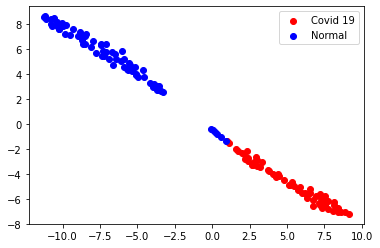

In [10]:
labels = tsne_data_generator.labels  # lots of 0 and 1

name_dic = {0:'Covid 19', 1:'Normal'}
color_dic = {0:'red', 1:'blue'}
#print(labels)

choose_0 = []
choose_1 = []

for i in range(len(labels)):
    if labels[i] == 0:
        choose_0.append(i)
    else:
        choose_1.append(i)

partial_tsne_x_0 = np.take(tsne_x, choose_0)
partial_tsne_y_0 = np.take(tsne_y, choose_0)
    
plt.scatter(partial_tsne_x_0, partial_tsne_y_0, label=name_dic[0], color=color_dic[0], marker='o')

partial_tsne_x_1 = np.take(tsne_x, choose_1)
partial_tsne_y_1 = np.take(tsne_y, choose_1)
    
plt.scatter(partial_tsne_x_1, partial_tsne_y_1, label=name_dic[1], color=color_dic[1], marker='o')
    
plt.legend(loc='best')
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->